In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn
import itertools

%matplotlib inline

In [2]:
df = pd.read_csv("car_data.csv")
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


### Tasks, Part 1
**1. Find the linear regression equation for mileage vs price.**

In [3]:
price = df['Price']
mileage = df[['Mileage']]
regr = linear_model.LinearRegression()
regr.fit(mileage, price)

/Users/JonathanKross/tiy/assignments/plaid_coat/.direnv/python-3.5.1/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
print("The R^2 value is {}".format(regr.score(mileage,price)))
print("The equation for the line is y =  {}x + {:.4f}".format(regr.coef_, regr.intercept_))

The R^2 value is 0.02046344732348948
The equation for the line is y =  [-0.1725205]x + 24764.5590


**2. Chart the original data and the equation on the chart.**

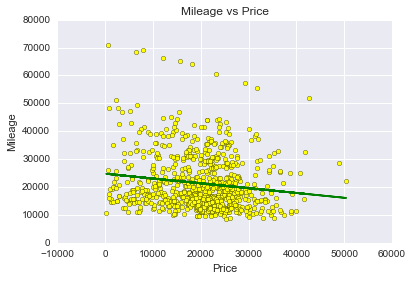

In [5]:
predict = regr.predict(mileage)
plt.scatter(mileage, price, c='yellow')
plt.plot(mileage, predict,  c='green')
plt.title("Mileage vs Price")
plt.xlabel("Price")
plt.ylabel("Mileage")

**3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [6]:
print("The equation's R2 score of linear regression: {:.4f}"
      .format(regr.score(mileage, price)))

The equation's R2 score of linear regression: 0.0205


### Tasks, Part 2
**1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.**

In [7]:
feature_columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
car_features = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
price = df['Price']
regr2 = linear_model.LinearRegression()
regr2.fit(car_features, price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
print("Intercept = {}".format(regr2.intercept_))
print("Coefficients =")
list(zip(feature_columns, regr2.coef_))

Intercept = 6758.755143598053
Coefficients =


[('Mileage', -0.16974783233303678),
 ('Cylinder', 3792.3789307825205),
 ('Liter', -787.22073163383016),
 ('Doors', -1542.7458463820631),
 ('Cruise', 6288.9971498499326),
 ('Sound', -1993.7952756984257),
 ('Leather', 3349.3616196135517)]

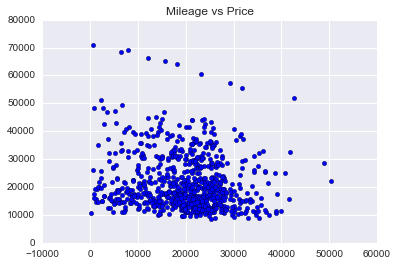

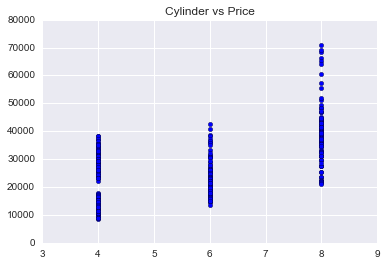

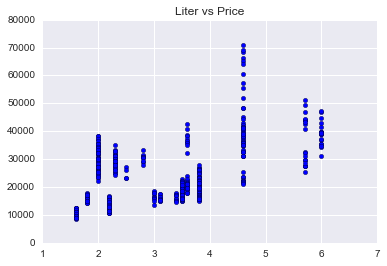

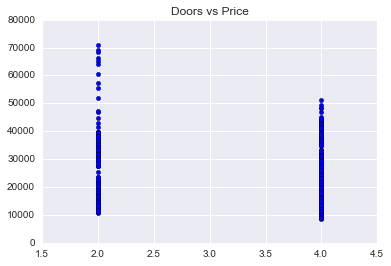

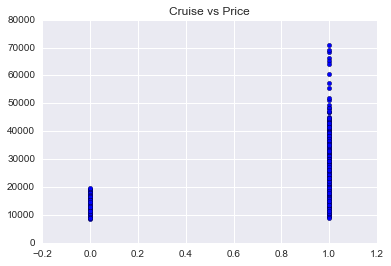

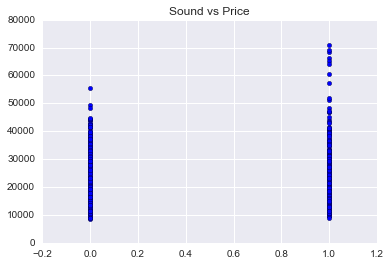

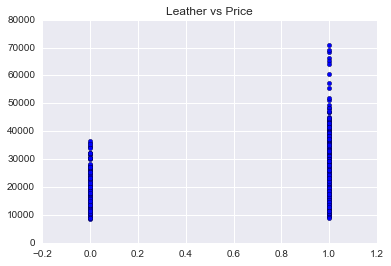

In [9]:
for x in feature_columns:
    plt.scatter(df[x], df['Price'])
    plt.title('{} vs Price'.format(x))
    plt.show()

**2. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [10]:
regr2.score(car_features, price)

0.44626435367283801

**3. Find the combination of the factors that is the best predictor for price.**

In [17]:
car_features = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']]
feature_columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
price = df['Price']

In [18]:
combinations = [list(itertools.combinations(feature_columns, x)) for x in range(1,7)]
massaged_combos = [list(iterable) for lst in combinations for iterable in lst]
# massaged_combos = []
# for lst in combinations:
#     for iterable in lst:
#         massaged_combos.append(list(iterable))

In [19]:
scores = []
for lst in massaged_combos:
    regr_cars = linear_model.LinearRegression()
    regr_cars.fit(df[lst], price)
    scores.append((regr_cars.score(df[lst], price), lst))

In [20]:
sorted(scores, reverse=True)

[(0.4456909210587025,
  ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.43780574153663798,
  ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather']),
 (0.43694021512372461, ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather']),
 (0.43014148406475605,
  ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather']),
 (0.43001820483252684, ['Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather']),
 (0.42653486378092642,
  ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.42576813279744219, ['Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.42482840454267856,
  ['Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']),
 (0.42441824017998753,
  ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound']),
 (0.42409748258510405, ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound']),
 (0.42253076703984671, ['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather']),
 (0.42250742147747622, ['Mileage', 'Cylinder', 'Cruise', 'Leather']),
 (0.419

From the above cell we can see the highest possible score is 0.4457 from the combination of 'Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'.

This is still lower than the score of 0.4462 which was obtained from using all seven columns, 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'.

This would imply that for th

### Tasks, Part 3
1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.